# Анализ имён

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
%matplotlib inline
import os

In [2]:
PATH = 'babynames/'
df = pd.DataFrame(columns=['name','sex','num','year'])
for filename in os.listdir(PATH):
    with open(PATH + filename, 'r') as f:
        df_t = pd.read_csv(f, names = ['name','sex','num'])
        df_t['year'] = int(filename[3:7])
        df = df.append(df_t)

In [3]:
df.head()

,name,sex,num,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


## Сгруппируйте данные по полу и году и визуализируйте общую динамику рождаемости обоих полов

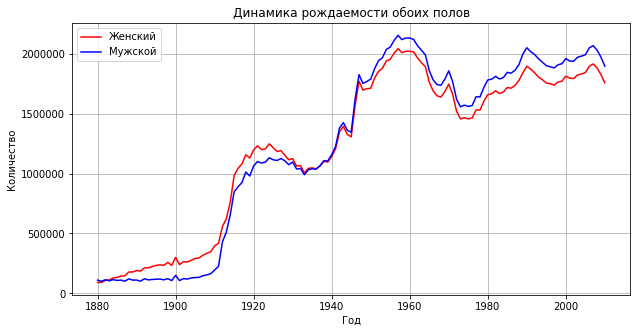

In [4]:
table = df.pivot_table(index='year', values='num', columns='sex', aggfunc=sum)
table['F'].plot(figsize=(10, 5), legend=True, label='Женский', color='red')
table['M'].plot(figsize=(10, 5), legend=True, label='Мужской', color='blue')
plt.ylabel('Количество');
plt.xlabel('Год');
plt.title('Динамика рождаемости обоих полов')
plt.grid(True)

## Найдите самые популярные имена за всю историю

In [5]:
names_num = df.pivot_table(index='name', values='num', aggfunc=sum)

### cамые популярные имена:

In [6]:
names_num.sort_values('num', ascending=False).head(15)

,num
name,
James,5072771
John,5061897
Robert,4788050
Michael,4265373
Mary,4119074
William,4002392
David,3538748
Richard,2552269
Joseph,2529809


## Разбейте весь временной промежуток в данных на 10 частей и для каждой найдите самое популярное имя каждого пола. Для каждого найденного имени визуализируйте его динамику за все время

1880 - 1893	мужское:John	женское:Mary
1893 - 1906	мужское:John	женское:Mary
1906 - 1919	мужское:John	женское:Mary
1919 - 1932	мужское:Robert	женское:Mary
1932 - 1945	мужское:Robert	женское:Mary
1945 - 1958	мужское:James	женское:Mary
1958 - 1971	мужское:Michael	женское:Lisa
1971 - 1984	мужское:Michael	женское:Jennifer
1984 - 1997	мужское:Michael	женское:Jessica
1997 - 2010	мужское:Jacob	женское:Emily


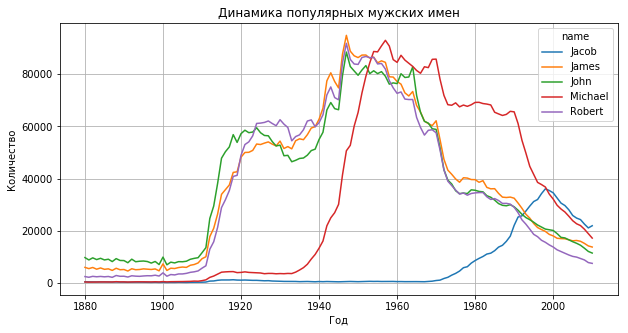

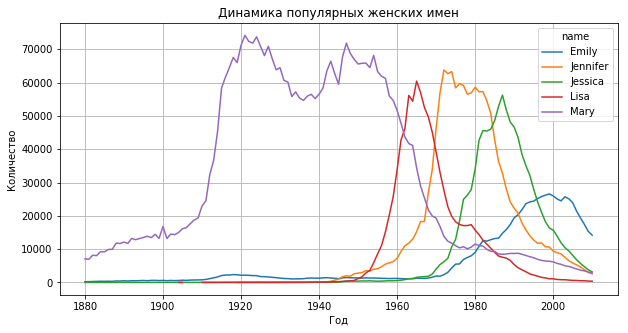

In [7]:
males = []
females = []

count = df['year'].value_counts().count()//10
for i in range(10):
    year_from = 1880+i*count
    year_to = 1880+i*count+count
    male_df = df[(df['sex']=='M') & (df['year'].between(year_from, year_to, inclusive=True))]\
                .pivot_table(index='name', values='num', aggfunc=sum)\
                .sort_values('num', ascending=False).head(1).reset_index()['name'][0]
    female_df = df[(df['sex']=='F') & (df['year'].between(year_from, year_to, inclusive=True))]\
                .pivot_table(index='name', values='num', aggfunc=sum)\
                .sort_values('num', ascending=False).head(1).reset_index()['name'][0]
    males.append(male_df)
    females.append(female_df)
    print('{0} - {1}\tмужское:{2}\tженское:{3}'.format(year_from, year_to, male_df, female_df))
df[(df['name'].isin(males))]\
    .pivot_table('num', index='year', columns='name', aggfunc=sum) \
    .plot(figsize=(10, 5), legend=True)
plt.ylabel('Количество')
plt.xlabel('Год')
plt.title('Динамика популярных мужских имен')
plt.grid(True)
df[(df['name'].isin(females))]\
    .pivot_table('num', index='year', columns='name', aggfunc=sum) \
    .plot(figsize=(10, 5), legend=True);
plt.ylabel('Количество')
plt.xlabel('Год')
plt.title('Динамика популярных женских имен')
plt.grid(True)

## Для каждого года рассчитайте сколько имен покрывают 50% людей, визуализируйте (мы увидим разнообразие имен за каждый год)

Text(0.5,1,'Разнообразие имен за каждый год')

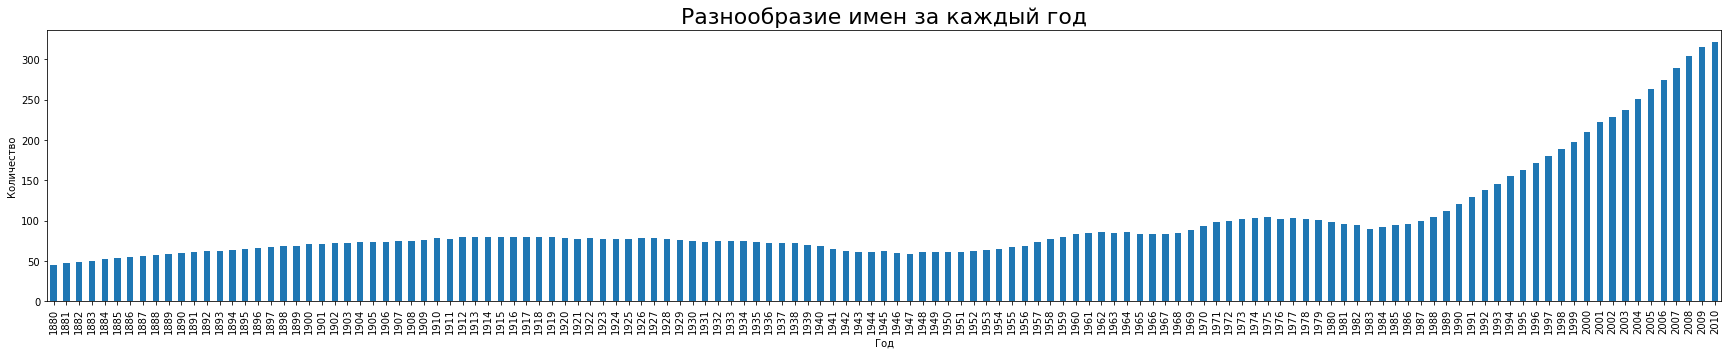

In [83]:
df1 = df.copy()
df1 = df1.groupby(['year']).apply(lambda x: x['num']/x['num'].sum())
df1 = df1.groupby(['year']).apply(lambda x: x.sort_values(ascending=False).cumsum().values.searchsorted(0.5))
df2 = df1.to_frame()
df2.reset_index(inplace=True)
df2.columns = ['year','num']
df2.pivot_table(index='year', values='num', aggfunc=sum).plot.bar(figsize=(30, 5), legend=False)
plt.ylabel('Количество')
plt.xlabel('Год')
plt.title('Разнообразие имен за каждый год', fontsize=22)


## Выберите 4 года из всего промежутка и отобразите для каждого года распределение по первой букве в имени, по последней букве в имени

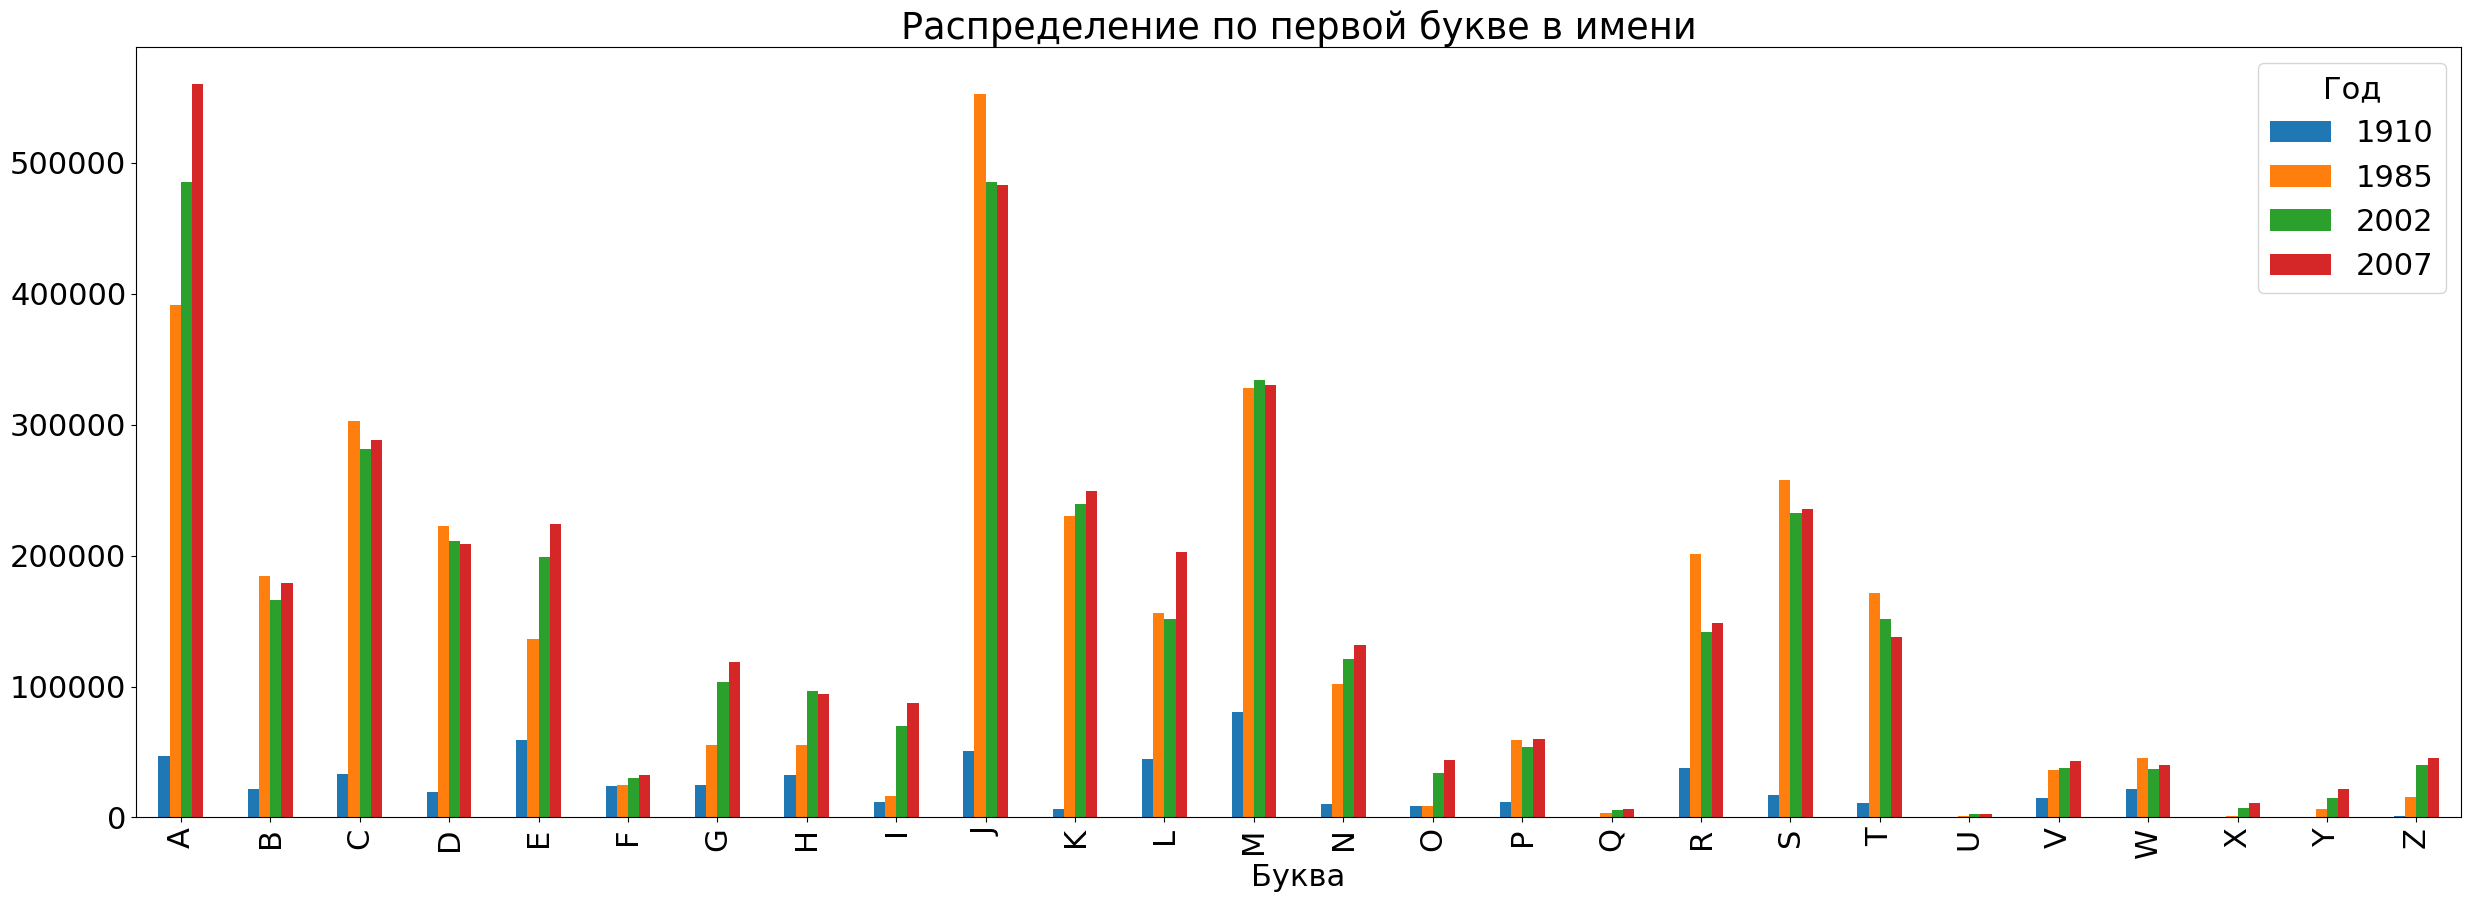

In [100]:
font = {'size'   : '22'}
matplotlib.rc('font', **font)
YEARS = [1910,1985,2002,2007]
df3 = df.copy()
first_letters = df3['name'].apply(lambda x: x[0])
last_letters = df3['name'].apply(lambda x: x[-1])
first_letters_table = df3.pivot_table('num', index=first_letters, columns='year', aggfunc=sum)[YEARS]
last_letters_table = df3.pivot_table('num', index=last_letters, columns='year', aggfunc=sum)[YEARS]
first_letters_table.plot.bar(figsize=(30, 10), legend=True)
plt.title('Распределение по первой букве в имени')
plt.xlabel('Буква')
legend=plt.legend(title='Год')

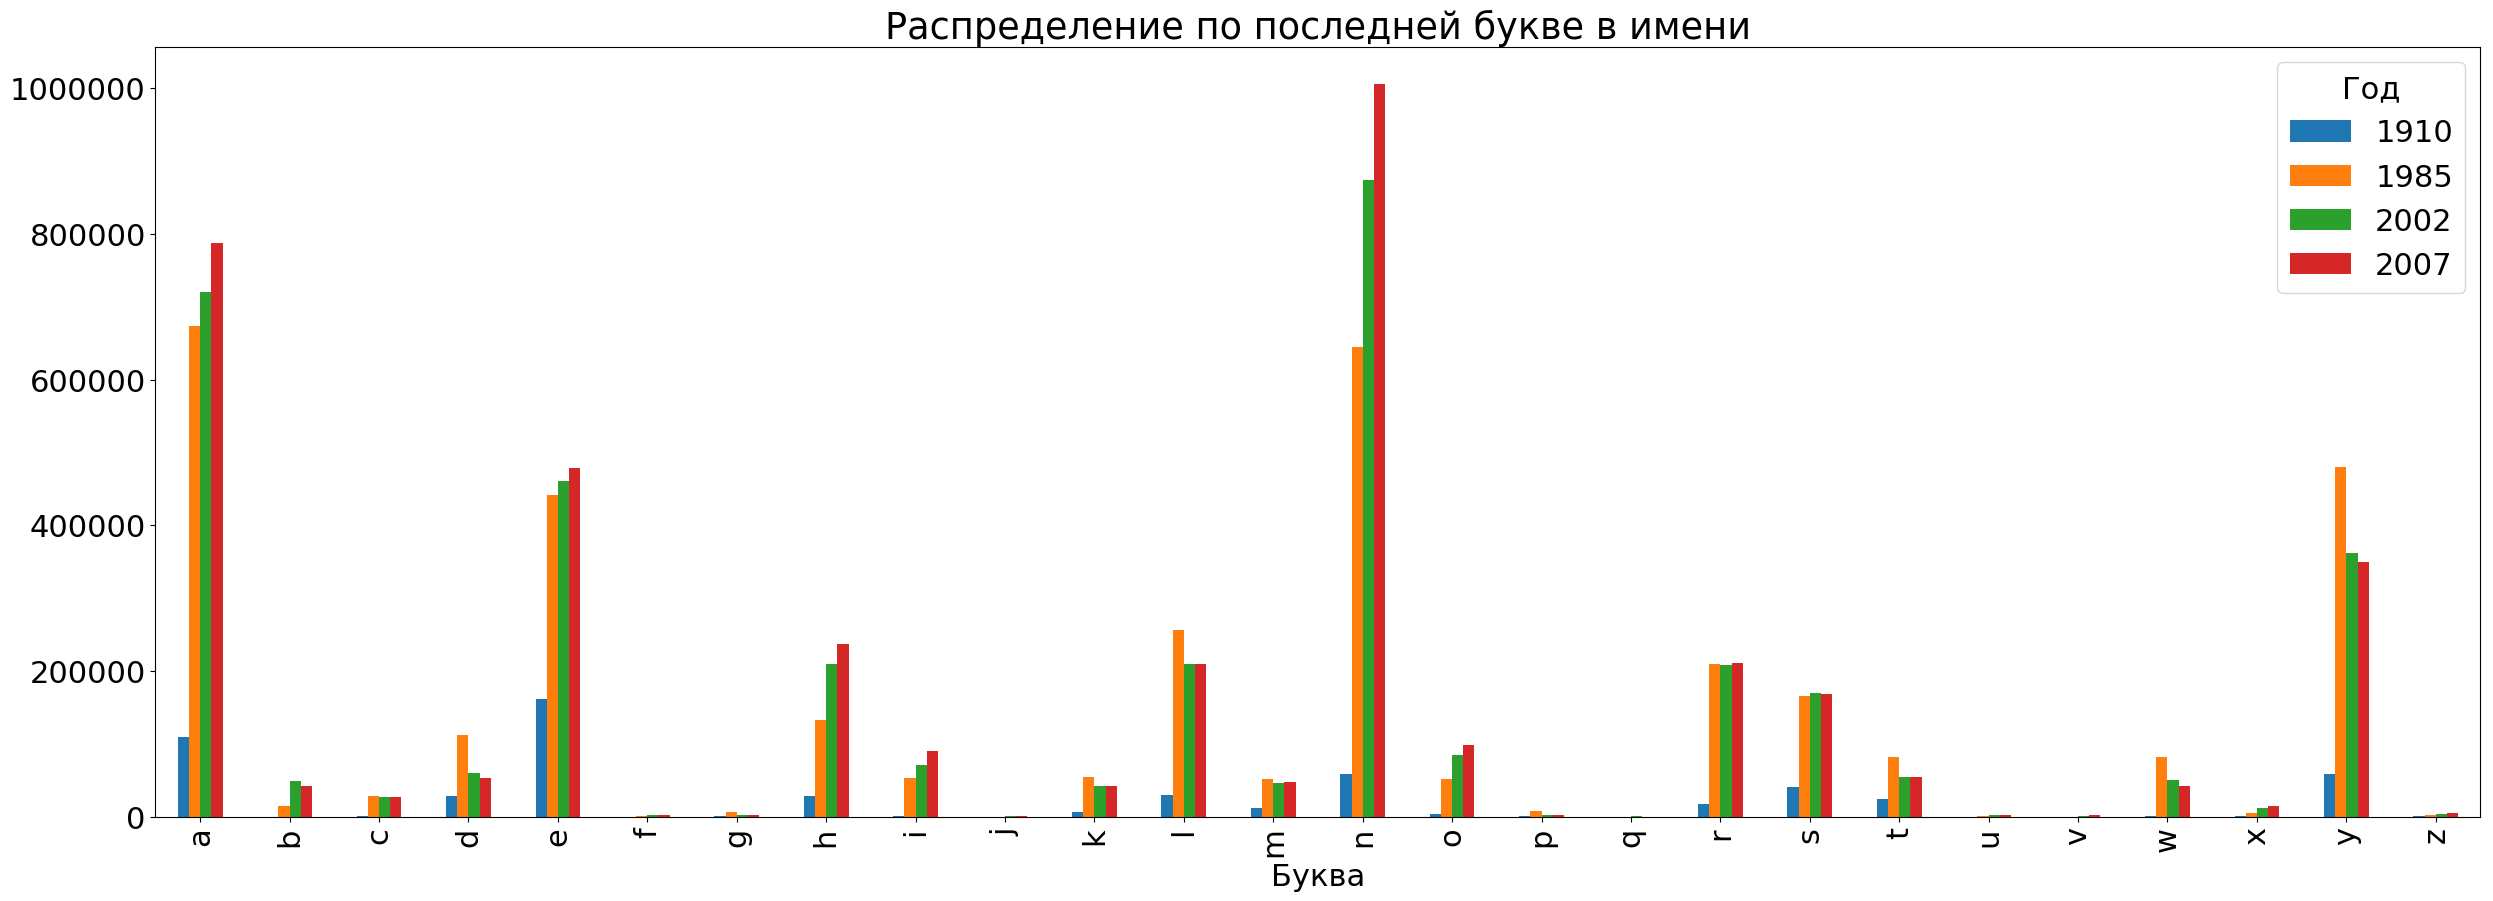

In [101]:
last_letters_table.plot.bar(figsize=(30, 10), legend=True)
plt.title('Распределение по последней букве в имени')
plt.xlabel('Буква')
legend=plt.legend(title='Год')

## Составьте список из нескольких известных людей (президенты, певцы, актеры, киногерои) и оцените их влияние на динамику имен, постройте наглядную визуализацию

### Выберем некоторых известных личностей в истории США и отметим важные даты в их истории:

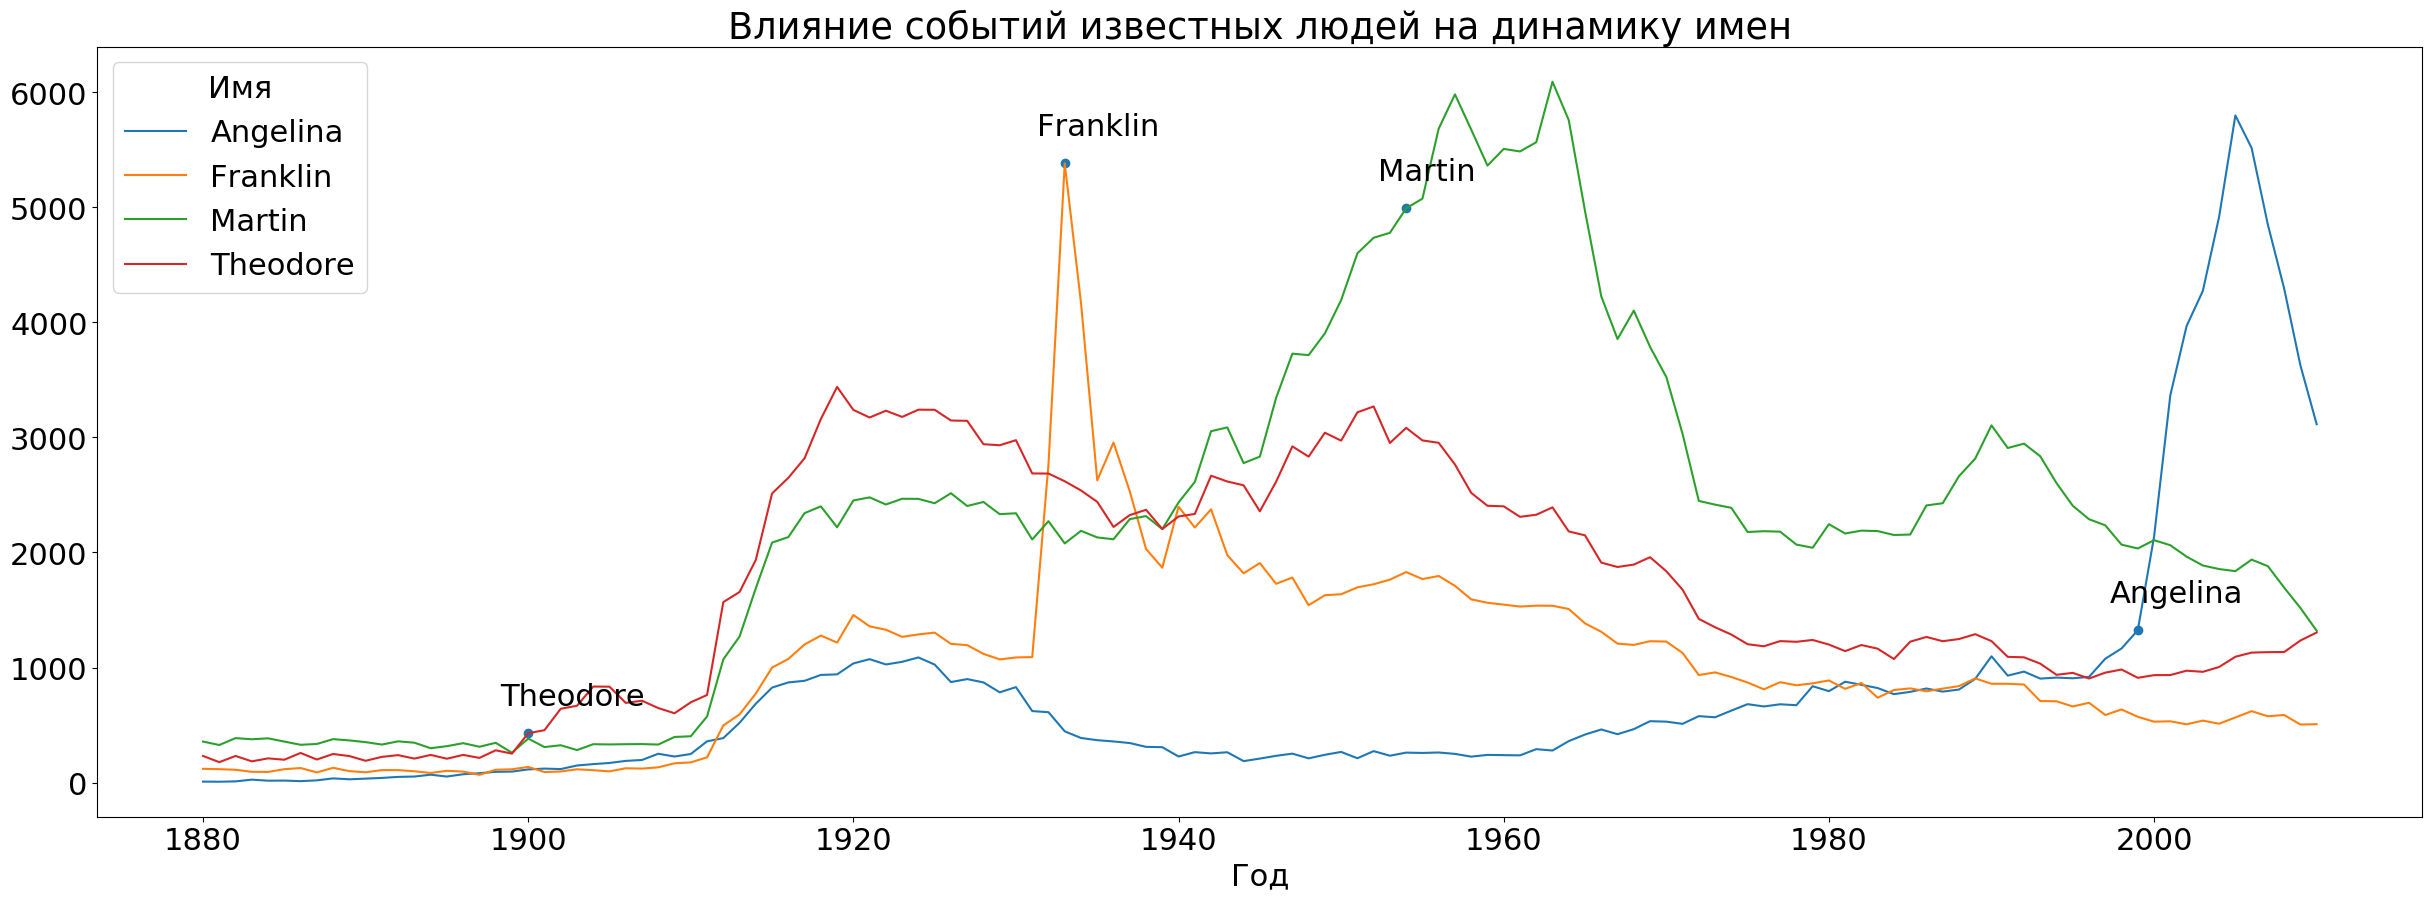

In [249]:
# Henry Ford, 
FAMOUS_NAMES = {
                'Theodore':1900,  # Theodore Roosevelt, president from 1900
                'Franklin':1933,  # Franklin Delano Roosevelt, president from 1933
                'Martin':1954,  # Martin Luther King, greatest activity
                'Angelina':1999,  # Angelina Jolie, debut
               }
df4 = df[df['name'].isin(FAMOUS_NAMES.keys())]
famous_names_table = df4.pivot_table('num', index='year', columns='name', aggfunc=sum)
famous_names_table.plot(figsize=(30, 10), legend=True)
plt.title('Влияние событий известных людей на динамику имен')
plt.xlabel('Год')
legend=plt.legend(title='Имя')
a = []
b = []
for key, value in FAMOUS_NAMES.items():
    a.append(FAMOUS_NAMES[key])
    b.append(famous_names_table.loc[value][key])
plt.scatter(a,b)
for label, x, y in zip(FAMOUS_NAMES.keys(), a, b):
    plt.annotate(label, xy=(x,y),xytext=(-20, 20), textcoords='offset points')

### Выводы
1. Известные и популярные люди действительно влияют на выбор имен.
2. Второй вывод, что в данных скорее всего большой пробел, примерно до 1915 года, возможно по причинам, того что данные основаны на SSN, которые начали выдавать только в 1936 году